In [ ]:
import numpy as np
import matplotlib as plt

In [ ]:
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float, skiprows= 1))
data_test = np.array(np.loadtxt("/content/HW2_test_set.csv", delimiter = ",", dtype = float, skiprows = 1))

OSError: ignored

In [ ]:
def datasplit(x):
  training_data = x[:,:-1]
  training_label = x[:,-1]
  return training_data,training_label

def class_mean(x1, n):

  class_out = []
  for i in range(0,n):
    class_out.append(np.mean(x1[x1[:,-1] == i][:,:-1], axis = 0).reshape(-1,1))

  return class_out

################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Updated by Thanos Rompokos
## Tested in Python 3.9.15
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries_2(training, label_train, sample_mean, fsize=(6,4),legend_on = False):

    '''
    Plot the decision boundaries and data points for minimum distance to
    class mean classifier

    training: traning data, N x d matrix:
        N: number of data points
        d: number of features
        if d > 2 then the first and second features will be plotted (1st and 2nd column (0 and 1 index));
                 recommended to input an Nx2 dataset with the 2 columns of the features to be plotted
    label_train: class lables correspond to training data, N x 1 array:
        N: number of data points
    sample_mean: mean vector for each class, C x d matrix:
        C: number of classes (up to 5 classes the way the plot symbos are defined)
        each row of the sample_mean matrix is the coordinate of each sample mean
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    '''

    #
    label_train = label_train.astype(int)
    # Total number of classes
    nclass =  len(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    mean_symbol_ar = np.array(['rd', 'bd', 'md', 'cd','gd','yd','kd','gd','rd','bd'])
    markerfacecolor_ar = np.array(['r', 'b', 'm', 'c','g','y','k','g','r','b'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class training data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    mean_list = [] # for legend
    mean_lis_name = [] # for legend
    for cur_label in np.unique(label_train):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(training[label_train == cur_label, 0],training[label_train == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)

        # plot the class mean vector.
        m1, = plt.plot(sample_mean[cur_label,0], sample_mean[cur_label,1], mean_symbol_ar[plot_index], markersize=12, markerfacecolor=markerfacecolor_ar[plot_index], markeredgecolor='w')
        # include legend for class mean vector
        if legend_on:
            mean_list.append(m1)
            mean_lis_name.append('Class '+str(plot_index)+' mean')
            l1 = plt.legend(mean_list,mean_lis_name, loc=4)
            plt.gca().add_artist(l1)

        plot_index = plot_index + 1

    plt.show()

def train(training_data, x):
  n = x.shape[0]
  l3 = []
  for i in range(0,n):
    l3.append(np.linalg.norm((training_data - x[i]),axis = 1))
  l3 = np.array(l3)
  class_labels = np.argmin(l3, axis = 0)
  return class_labels

def accuracy(l1,l2):

  count = 0
  n = int(l1.shape[0])
  for i in range(0,n):

   if(l1[i]!= l2[i]):
      count += 1
  return((1-(count/n))*100)



In [ ]:
def main_func(training, testing):

  #Splitting the dataset into data and labels
  [train_data, train_label] = datasplit(training)
  [test_data, test_label] = datasplit(testing)

  #Calculating the Class Means
  class0, class1, class2, class3, class4 = (class_mean(training, 5))
  means = np.concatenate((class0.T,class1.T, class2.T, class3.T, class4.T),axis = 0)

  #Training the Train Dataset and printing accuracy
  train_out = train(train_data,means)
  train_accuracy = accuracy(train_out,train_label)
  print('The classification accuracy for the training dataset is {}%'.format(train_accuracy))

  #Testing the Test Dataset and printing accuracy
  test_out = train(test_data, means)
  test_accuracy = accuracy(test_out, test_label)
  print('The classification accuracy for the testing dataset is {}%'.format(test_accuracy))


In [ ]:
main_func(data_train,data_test)

The classification accuracy for the training dataset is 85.23809523809524%
The classification accuracy for the testing dataset is 82.44444444444444%


In [ ]:
def plot_func(training,testing):
  [train_data, train_label] = datasplit(training)
  [test_data, test_label] = datasplit(testing)

  #Calculating the Class Means
  class0, class1, class2, class3, class4 = (class_mean(training, 5))
  means = np.concatenate((class0.T,class1.T, class2.T, class3.T, class4.T),axis = 0)

  #Training the Train Dataset and printing accuracy
  i = int(input('The features required:'))
  j = int(input('The features required:'))
  train_out = train(train_data[:,[i,j]],means[:,[i,j]])
  train_accuracy = accuracy(train_out,train_label)
  print('The classification accuracy for the training dataset is {}%'.format(train_accuracy))

  #Testing the Test Dataset and printing accuracy
  test_out = train(test_data[:,[i,j]], means[:,[i,j]])
  test_accuracy = accuracy(test_out, test_label)
  print('The classification accuracy for the testing dataset is {}%'.format(test_accuracy))

  #Plotting
  plotDecBoundaries_2(train_data[:,[i,j]], train_label, means[:,[i,j]], fsize=(10,7),legend_on = True)

The features required:0
The features required:1
The classification accuracy for the training dataset is 50.857142857142854%
The classification accuracy for the testing dataset is 48.0%


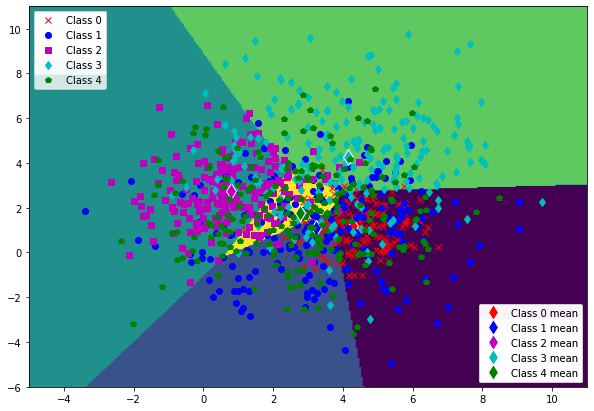

In [ ]:
plot_func(data_train, data_test)

The features required:2
The features required:3
The classification accuracy for the training dataset is 60.952380952380956%
The classification accuracy for the testing dataset is 60.44444444444444%


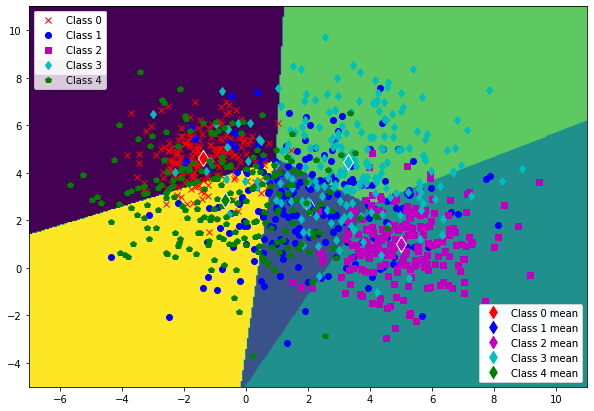

In [ ]:
plot_func(data_train, data_test)

The features required:2
The features required:6
The classification accuracy for the training dataset is 67.61904761904762%
The classification accuracy for the testing dataset is 63.77777777777778%


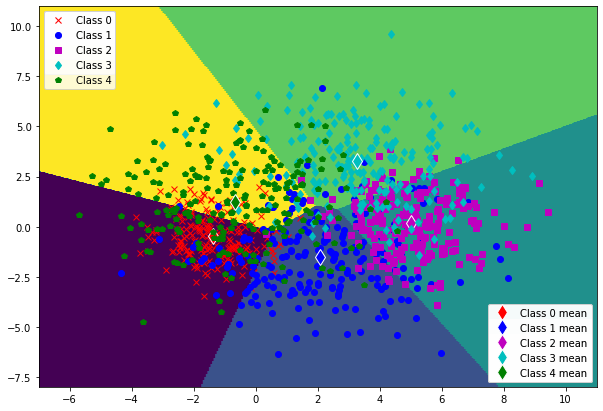

In [ ]:
plot_func(data_train, data_test)